# pistachio


In [1]:
# convert arff to parquet

from scipy.io import arff 
import pandas as pd
import os

arff_filepath = './data/Pistachio_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.arff'
parquet_path = './data/pistachio_16.snappy.pqt'

def arff_to_parquet(input_arff: str, output_parquet: str):
    """convert arff file to parquet"""
    if not os.path.exists(input_arff):
        raise ValueError(f"input file '{input_arff}' does not exist")
    data, meta = arff.loadarff(input_arff)
    print("arff metadata")
    print(meta)
    df = pd.DataFrame(data)
    df['Class'] = df['Class'].astype(str)
    df.to_parquet(output_parquet)
##################

if not os.path.exists(parquet_path):
    print("converting arff to parquet")
    arff_to_parquet(arff_filepath, parquet_path)


In [2]:
# Dataset: Pistachio_16_Features_Dataset
# 	AREA's type is numeric
# 	PERIMETER's type is numeric
# 	MAJOR_AXIS's type is numeric
# 	MINOR_AXIS's type is numeric
# 	ECCENTRICITY's type is numeric
# 	EQDIASQ's type is numeric
# 	SOLIDITY's type is numeric
# 	CONVEX_AREA's type is numeric
# 	EXTENT's type is numeric
# 	ASPECT_RATIO's type is numeric
# 	ROUNDNESS's type is numeric
# 	COMPACTNESS's type is numeric
# 	SHAPEFACTOR_1's type is numeric
# 	SHAPEFACTOR_2's type is numeric
# 	SHAPEFACTOR_3's type is numeric
# 	SHAPEFACTOR_4's type is numeric
# 	Class's type is nominal, range is ('Kirmizi_Pistachio', 'Siit_Pistachio')

## Load Data
load data from parquet, stratify split to train and test

In [3]:
from typing import List
import numpy as np
from sklearn.model_selection import train_test_split

def split_data(
        input_parquet: str, 
        train_filename: str,
        test_filename: str,
        label_column: str,
        test_fraction: float=0.2,
        seed: int=42):
    """stratify sample the data"""
    # set seed
    # np.random.seed(seed)
    in_df = pd.read_parquet(input_parquet)
    y = in_df.pop(label_column)
    x_train, x_test, y_train, y_test = train_test_split(
        in_df, 
        y, 
        random_state=seed, 
        stratify=y, 
        test_size=test_fraction)
    # reattach labels
    x_train[label_column] = y_train
    x_test[label_column] = y_test
    print(f'x_train shape = {x_train.shape}')
    print(f'y_train shape = {y_train.shape}')
    print(f'x_test shape = {x_test.shape}')
    print(f'y_test shape = {y_test.shape}')
    # write data
    x_train.to_parquet(train_filename)
    x_test.to_parquet(test_filename)
##############################

train_path = './data/pistachio_train.pqt'
test_path = './data/pistachio_test.pqt'
split_seed = 41
label_column = 'Class'
test_fraction = 0.2
input_data_schema_path = "./data/pistachio_schema.json"

if not (os.path.exists(train_path) and os.path.exists(test_path)):
    split_data(
        parquet_path,
        train_path,
        test_path,
        label_column=label_column,
        test_fraction=test_fraction,
        seed=split_seed)
    print('split train and test data')


## Validate Data

In [4]:
#! pip install pandera[io]

In [5]:
# very quick EDA/summary on the train data
train = pd.read_parquet(train_path)
summary = train.describe(include='all')
summary

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kirmizi_Pistachio
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,985
mean,79990.176368,1423.800903,446.184575,238.404956,0.840033,318.003064,0.940279,85048.962165,0.715327,1.897053,0.571019,0.713397,0.005698,0.003016,0.510931,0.955492,NaN
std,13075.738130,375.345641,32.531725,30.372990,0.048895,26.853806,0.050205,13180.036678,0.053204,0.239194,0.212615,0.044681,0.000825,0.000333,0.064074,0.050951,NaN
min,29808.000000,858.363000,320.344500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400,NaN
25%,71859.500000,1169.588750,426.337050,217.925450,0.817225,302.480300,0.920025,76334.000000,0.685225,1.735225,0.375375,0.682225,0.005200,0.002800,0.465425,0.944000,NaN
50%,79997.500000,1261.599000,448.897750,236.299450,0.849200,319.148850,0.954500,85097.000000,0.725800,1.893500,0.644100,0.710850,0.005600,0.003000,0.505350,0.973300,NaN
75%,89018.000000,1603.212000,468.631300,257.292375,0.875100,336.661875,0.976775,93919.000000,0.753575,2.066650,0.744500,0.742300,0.006100,0.003200,0.551000,0.987200,NaN


In [6]:

import pandera as pa
# schema = pa.infer_schema(train)
# print(schema)
from pandera import Check, Column, DataFrameSchema
# define schema based on inspecting the training data above
if not os.path.exists(input_data_schema_path):
# if True:
    print("creating schema")
    schema = DataFrameSchema(
        columns={
            "AREA": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=100.0),
                    Check.less_than_or_equal_to(max_value=1e6)
                ],
                nullable=False
            ),
            "PERIMETER": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=100.0),
                    Check.less_than_or_equal_to(max_value=1e6)
                ],
                nullable=False
            ),
            "MAJOR_AXIS": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=10.0),
                    Check.less_than_or_equal_to(max_value=1e6)
                ],
                nullable=False
            ),
            "MINOR_AXIS": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=10.0),
                    Check.less_than_or_equal_to(max_value=1e6)
                ],
                nullable=False
            ),
            "ECCENTRICITY": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "EQDIASQ": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=100.0),
                    Check.less_than_or_equal_to(max_value=1e6)
                ],
                nullable=False
            ),
            "SOLIDITY": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "CONVEX_AREA": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=1000.0),
                    Check.less_than_or_equal_to(max_value=1e6)
                ],
                nullable=False
            ),
            "EXTENT": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "ASPECT_RATIO": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=100.0)
                ],
                nullable=False
            ),
            "ROUNDNESS": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "COMPACTNESS": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "SHAPEFACTOR_1": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "SHAPEFACTOR_2": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "SHAPEFACTOR_3": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "SHAPEFACTOR_4": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "Class": Column(
                dtype="object",
                checks=[
                    Check.isin(['Siit_Pistachio', 'Kirmizi_Pistachio'])
                ],
                nullable=False
            )
        }
    )
    print(schema)
    schema.to_json(input_data_schema_path)
    print(f"wrote schema to {input_data_schema_path}")


In [7]:

# Validate Data (dtypes, count nulls)
# preprocess - feature engineering, cast class to 1/0
# tune - hyperopt or bayes_opt
# stash metadata/experiment results
# train with best parameters
# evaluate
# run inference on dummy "new" data
from pandera import DataFrameSchema
def validate_data(in_df: pd.DataFrame, schema_file: str) -> pd.DataFrame:
    """check input data, count nulls, basic stats"""
    # load schema
    the_schema = DataFrameSchema.from_json(schema_file)
    the_schema.validate(in_df)

    
    
    # summary = in_df.describe(include='all')
    # # check for entirely missing columns
    # entirely_missing = [x for x in in_df.columns if summary.loc['count', x] == 0]
    # if entirely_missing:
    #     raise ValueError(f'following columns in supplied data are missing: {entirely_missing}')
    # # check that columns have more than one unique value
    # single_value_columns = [x for x in in_df.columns if summary.loc['unique', column] == 1]
    # if entirely_missing:
    #     raise ValueError(f'following columns in supplied data are missing: {entirely_missing}')

validate_data(train, input_data_schema_path)

print("no errors, data looks good")



# train['Class'] = train.Class.astype('category')
# train.Class.cat.codes

# https://pandas.pydata.org/docs/user_guide/categorical.html#controlling-behavior


no errors, data looks good


In [8]:
from pandas.api.types import CategoricalDtype
def preprocess(in_raw_df: pd.DataFrame) -> pd.DataFrame:
    """preprocess the data, do any cleaning, feature engineering, etc"""
    out_df = in_raw_df.copy()

    #cross some features
    out_df['SOLIDITY_MAJOR'] = out_df.SOLIDITY*out_df.MAJOR_AXIS

    # reorder
    cols = [x for x in out_df.columns if x != 'Class']
    out_df = out_df[cols + ['Class']]

    # convert Class to categorical
    class_type = CategoricalDtype(categories=['Siit_Pistachio', 'Kirmizi_Pistachio'])
    out_df.Class = out_df.Class.astype(class_type)
    # create a binary column
    out_df['Target'] = out_df.Class.cat.codes

    return out_df

train_proc = preprocess(train)
train_proc.head()


    
    

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,SOLIDITY_MAJOR,Class,Target
1903,101005.0,1382.8000,476.3697,279.0725,0.8104,358.6134,0.9478,106565.0,0.7732,1.7070,0.6638,0.7528,0.0047,0.0028,0.5667,0.9674,451.503202,Siit_Pistachio,0
1168,96240.0,1427.5699,476.6801,264.1641,0.8324,350.0522,0.9703,99186.0,0.7946,1.8045,0.5934,0.7344,0.0050,0.0027,0.5393,0.9731,462.522701,Kirmizi_Pistachio,1
716,48509.0,1020.7170,439.9729,143.3477,0.9454,248.5228,0.9792,49537.0,0.7156,3.0693,0.5851,0.5649,0.0091,0.0030,0.3191,0.9793,430.821464,Kirmizi_Pistachio,1
1570,100634.0,1260.0811,481.9576,266.3690,0.8334,357.9542,0.9925,101396.0,0.7059,1.8094,0.7964,0.7427,0.0048,0.0026,0.5516,0.9981,478.342918,Siit_Pistachio,0
889,81407.0,1244.4410,497.2620,220.6327,0.8962,321.9482,0.9254,87965.0,0.5527,2.2538,0.6606,0.6474,0.0061,0.0027,0.4192,0.9447,460.166255,Kirmizi_Pistachio,1


## Feature Metrics - drift monitoring


In [91]:
from abc import ABC, abstractmethod
import pickle
import pandas as pd
from typing import List, Dict
import numpy as np


class FeatureMetric(ABC): 
    """Abstract Base Class for feature metrics"""
    @abstractmethod  
    def fit(self, reference_data: pd.DataFrame, **kwargs):
        """learn parameters of data distribution"""
        pass
    @abstractmethod
    def evaluate(self, eval_data, **kwargs):
        """evaluate supplied data against learned distribution"""
        pass
    @abstractmethod
    def save(self, file_path: str):
        """save this object"""
        pass

    @classmethod
    @abstractmethod
    def load(cls, filepath: str):
        """load object from file, return result"""
        pass

class PSImetrics(FeatureMetric):
    """class for computing Poppulation Stability Index
    string columns are supported as categorical columns, but not continuous (qcut errors on them)"""
    def __init__(self, max_unique_values=20, n_bins=20):
        self._categorical_cols = []
        self._continuous_cols = []
        self._max_unique_values = max_unique_values
        self._n_bins = n_bins
        self._psi_zero_bin_delta = 0.01 
        self._data_metrics = {}
    
    @property 
    def categorical_cols(self):
        """getter for categorical cols"""
        return self._categorical_cols

    @categorical_cols.setter 
    def categorical_cols(self, cols: List[str]):
        """setter for categorical cols"""
        self._categorical_cols = cols
        self._continuous_cols = list(set(self._continuous_cols) - set(cols))

    @property 
    def continuous_cols(self):
        """getter for continuous cols"""
        return self._continuous_cols

    @continuous_cols.setter 
    def continuous_cols(self, cols: List[str]):
        """setter for continuous cols"""
        self._continuous_cols = cols
        self._categorical_cols = list(set(self._categorical_cols) - set(cols))

    def infer_columns(self, data: pd.DataFrame, ignore_cols: List[str]=None):
        """attempt to determine categorical/continuous columns"""

        if ignore_cols:
            data=data.drop(columns=ignore_cols)

        # floats are continuous
        self._continuous_cols.extend(data.select_types(include=['float64']).columns)
        # categories are categorical
        self._categorical_cols.extend(data.select_types(include=['category']).columns)

        # integers strings dates  are categorical if there are few distinct values
        for cc in data.select_types(include=['int64','object','datetime64']).columns:
            if data[cc].nunique > self._max_unique_values:
                self._continuous_cols.append(cc)
            else:
                self._categorical_cols.append(cc)
        
        print("inferred column types:")
        print(f"categorical columns: {self._categorical_cols}")
        print(f"continuous columns: {self._continuous_cols}")

    def _fit_continuous_column(self, col: pd.Series):
        # map continuous to categorical
        # missing = col.isna().sum()
        catted, bins = pd.qcut(col,self._n_bins, retbins=True, labels=False, duplicates='drop')
        # this is good for floats, but may need to adapt for other dtype
        if pd.api.types.is_datetime64_any_dtype(col):
            bins = np.array([pd.Timestamp.min] + list(bins) + [pd.Timestamp.max])
        else:        
            bins = np.array([-np.inf] + list(bins) + [np.inf])
        
        cat_result = self._fit_categorical_column(pd.Series(catted))
        cat_result['bin_thresholds'] = bins
        return cat_result
        
    def _fit_categorical_column(self, col: pd.Series):
        """get properties of categorical column"""

        total = len(col)
        # the_by = by if by else col
        proportions = {val: float(count/total) for val, count in zip(*np.unique(col[~col.isna()], return_counts=True))}
        missing = col.isna().sum()
        # result = {'name': col.name}
        # for k,v in zip(proportions.index, proportions.values):
        #     result[k] = v 
        result = {} 
        result['proportions'] = proportions
        result['_NA'] = missing/total 
        result['_TOTAL_EVENTS'] = total
        return result
    
    def _evaluate_categorical_column(self, col: pd.Series, from_continuous=False):
        """evaluate a categorical column"""
        eval_total = len(col)
        eval_proportions = {val: count/eval_total for val, count in zip(*np.unique(col[~col.isna()], return_counts=True))}
        eval_missing = col.isna().sum()

        reference_data = self._data_metrics['categorical_columns'].get(col.name) if not from_continuous\
              else self._data_metrics['continuous_columns'].get(col.name)
        reference_proportions = reference_data['proportions']
        reference_total = reference_data['_TOTAL_EVENTS']
        reference_missing = reference_data['_NA']

        if not reference_data:
            raise ValueError(f'Error - could not retrieve reference statistics for categorical column {col.name}')
        
        # adjust for missing/zero content bins
        zero_count_reference = list(set(eval_proportions.keys()) - set(reference_proportions.keys()))
        zero_count_eval = list(set(reference_proportions.keys()) - set(eval_proportions.keys()))
        if zero_count_eval:
            print(f'The following categories had zero count in evaluation data but were observed in reference data: {zero_count_eval}')
        if zero_count_reference: 
            print(f'The following categories had zero count in reference data but were observed in evaluation data: {zero_count_reference}')

        # compute PSI
        psi = 0
        for k in list(set(list(eval_proportions.keys()) + list(reference_data['proportions'].keys()))):
            ref_prop = reference_proportions.get(k, self._psi_zero_bin_delta/reference_total)
            eval_prop = eval_proportions.get(k, self._psi_zero_bin_delta/eval_total)

            psi += (ref_prop - eval_prop)*np.log(ref_prop/eval_prop)
        
        # flag if missing data not expected
        if (reference_missing == 0) and (eval_missing > 0):
            print(f'Column had no missing records in reference data, but {eval_missing} in evaluation data')
        
        # account for missing, if applicable
        if (reference_missing > 0) or (eval_missing > 0):
            reference_miss_prop = np.max([reference_missing,self._psi_zero_bin_delta])/reference_total
            eval_miss_prop = np.max([eval_missing,self._psi_zero_bin_delta])/eval_total
            # print(f'reference miss prop: {reference_miss_prop}, eval miss prop: {eval_miss_prop}')
            psi += (reference_miss_prop - eval_miss_prop)*np.log(reference_miss_prop/eval_miss_prop)

        # convert to json serialisable types
        if pd.api.types.is_datetime64_dtype(col):
            reference_proportions = {str(k): v for k,v in reference_proportions.items()}
            eval_proportions = {str(k): v for k,v in eval_proportions.items()}
        elif pd.api.types.is_integer_dtype(col):
            reference_proportions = {int(k): v for k,v in reference_proportions.items()}
            eval_proportions = {int(k): v for k,v in eval_proportions.items()}

        details = {
            'reference_total': int(reference_total),
            'reference_proportions':  reference_proportions,
            'reference_missing': reference_missing,
            'eval_total': eval_total,
            'eval_proportions': eval_proportions,
            'eval_missing': int(eval_missing),
            'PSI': psi
        }
        return psi, details
        
    def _evaluate_continuous_column(self, col: pd.Series):
        """evaluate a conntinuous column"""
        reference_data = self._data_metrics['continuous_columns'].get(col.name)
        bin_thresholds = reference_data['bin_thresholds']

        catted = pd.cut(col, bin_thresholds, labels=False)
        # this is an array not a series, will need to fix
        psi, details = self._evaluate_categorical_column(catted, from_continuous=True)
        
        if pd.api.types.is_datetime64_dtype(col):
            bin_thresholds = [str(x) for x in bin_thresholds] 
        else:
            bin_thresholds = bin_thresholds.tolist()
        details['bin_thresholds'] = bin_thresholds
        return psi, details

        
    def fit(self, reference_data: pd.DataFrame):
        """learn parameters of data distribution"""
        
        # only infer if no categorical/continuous columns are specified, and flag is True
        if not (self._categorical_cols or self._continuous_cols):
            raise ValueError('no categorical or continuous columns specified, either set categorical_cols or continuous_cols, or call infer_columns()')
        
        ignored_cols = list(set(reference_data.columns) - set(self._categorical_cols + self._continuous_cols))
        undefined_cols = list(set(self._categorical_cols + self._continuous_cols) - set(reference_data.columns))
        if undefined_cols:
            raise ValueError(f'the following columns are not present in input data: {undefined_cols}')

        print("analysing the following categorical columns:")
        print('\n'.join(self._categorical_cols))
        print("analysing the following continuous columns:")
        print('\n'.join(self._continuous_cols))
        print("the following columns in the data will be ignored:")
        print('\n'.join(ignored_cols))

        categorical_columns = {}
        for cc in self._categorical_cols:
            categorical_columns[cc] = self._fit_categorical_column(reference_data[cc])
        continuous_columns = {}
        for cc in self._continuous_cols:
            continuous_columns[cc] = self._fit_continuous_column(reference_data[cc])
        self._data_metrics = {
            'categorical_columns': categorical_columns,
            'continuous_columns': continuous_columns
            }
        print("fitting done!")

    def evaluate(self, eval_data, **kwargs):
        """evaluate supplied data against learned distribution"""

        ignored_cols = list(set(eval_data.columns) - set(self._categorical_cols + self._continuous_cols))
        print(f'the following columns will not be evalutated: {ignored_cols}')
        # loop over columns
        # categorical_columns
        results = { }
        psi_values = []
        for col in self._categorical_cols:
            if col not in eval_data.columns:
                raise ValueError(f'Error column {col} is missing from data to be evaluated')
            psi_val, details = self._evaluate_categorical_column(eval_data[col])
            psi_values.append((col, psi_val, 'categorical', eval_data.dtypes.get(col)))
            results[col] = details
            print(f'evaluated column {col}, PSI = {psi_val}')
        for col in self._continuous_cols:
            if col not in eval_data.columns:
                raise ValueError(f'Error column {col} is missing from data to be evaluated')
            psi_val, details = self._evaluate_continuous_column(eval_data[col])
            psi_values.append((col, psi_val, 'continuous', eval_data.dtypes.get(col)))
            results[col] = details
            print(f'evaluated column {col}, PSI = {psi_val}')
        return psi_values, results

    def save(self, filepath: str):
        """save this object"""
        with open(filepath, 'wb') as outfile:
            # pickle.dump(self.__dict__, outfile, pickle.HIGHEST_PROTOCOL)
            pickle.dump(self, outfile, pickle.HIGHEST_PROTOCOL)
        print(f"wrote data to {filepath}")       

    @classmethod
    def load(cls, filepath: str):
        """load object from file, return result"""
        with open(filepath, 'rb') as infile:
            obj = pickle.load(infile)
        print(f"read data from {filepath}")    
        return obj



In [92]:
moose_vals = ['cat','dog','wolf']
from datetime import datetime, timedelta
import json

dates = [ datetime(1979,7,1) + timedelta(days=ii) for ii in range(10)]
n = 20
data1 = pd.DataFrame({
    'string_col1': np.random.choice(moose_vals,n),
    'string_col2': np.random.choice(moose_vals,n),
    'float_col1':np.random.randn(n),
    'float_col2':np.random.randn(n),
    'int_col1': np.random.randint(0,7,size=n),
    'int_col2': np.random.randint(0,7,size=n),
    'date_col1': np.random.choice(dates,n),
    'date_col2': np.random.choice(dates,n)
})

data2 = pd.DataFrame({
    'string_col1': np.random.choice(moose_vals,n),
    'string_col2': np.random.choice(moose_vals,n),
    'float_col1':np.random.randn(n),
    'float_col2':np.random.randn(n),
    'int_col1': np.random.randint(0,7,size=n),
    'int_col2': np.random.randint(0,7,size=n),
    'date_col1': np.random.choice(dates,n),
    'date_col2': np.random.choice(dates,n)
})

data1.iloc[[3,7,10],0] = None
data1.iloc[[13,2,19],1] = None
data1.iloc[[6,14,7],2] = np.nan
data1.iloc[[3,7,10],3] = np.nan
data1.iloc[[13,2,19],4] = np.nan
data1.iloc[[6,14,7],5] = np.nan
data2.iloc[[3,7,10],0] = None
data2.iloc[[13,2,19],1] = None
data2.iloc[[6,14,7],2] = np.nan
# data1

psi = PSImetrics()
psi.categorical_cols = ['string_col1', 'float_col1', 'int_col1', 'date_col1']
psi.continuous_cols = [ 'float_col2', 'int_col2', 'date_col2'] # strings can't be continuous as yet


psi.fit(data1)
psi_path = './data/psi_test.pkl'
psi.save(psi_path)
psi2 = PSImetrics.load(psi_path)
psi_values, details = psi2.evaluate(data2)
for k in psi_values:
    print(k)



analysing the following categorical columns:
string_col1
int_col1
float_col1
date_col1
analysing the following continuous columns:
float_col2
int_col2
date_col2
the following columns in the data will be ignored:
string_col2
fitting done!
wrote data to ./data/psi_test.pkl
read data from ./data/psi_test.pkl
the following columns will not be evalutated: ['string_col2']
evaluated column string_col1, PSI = 0.4479525222352589
The following categories had zero count in evaluation data but were observed in reference data: [6.0]
evaluated column int_col1, PSI = 1.1781566197815079
The following categories had zero count in evaluation data but were observed in reference data: [-0.820603876417467, -0.6273277989011243, -0.19470898312692916, -0.43860797421989034, -0.6166286570671029, 0.1678737253450654, 0.19121908382766215, 0.2862770793414195, 0.48248205969700086, 0.5532521367639156, 0.5965120065241662, -1.5002349050875046, 1.0978022566564825, -1.4606979975504741, 0.8722457030293491, 1.5823958882850

In [93]:
details
# pd.api.types.is_datetime64_dtype(data1.date_col1)

{'string_col1': {'reference_total': 20,
  'reference_proportions': {'cat': 0.3, 'dog': 0.15, 'wolf': 0.4},
  'reference_missing': 0.15,
  'eval_total': 20,
  'eval_proportions': {'cat': 0.3, 'dog': 0.2, 'wolf': 0.35},
  'eval_missing': 3,
  'PSI': 0.4479525222352589},
 'int_col1': {'reference_total': 20,
  'reference_proportions': {0: 0.05,
   1: 0.1,
   2: 0.05,
   3: 0.35,
   4: 0.05,
   5: 0.15,
   6: 0.1},
  'reference_missing': 0.15,
  'eval_total': 20,
  'eval_proportions': {0: 0.1, 1: 0.15, 2: 0.1, 3: 0.15, 4: 0.25, 5: 0.25},
  'eval_missing': 0,
  'PSI': 1.1781566197815079},
 'float_col1': {'reference_total': 20,
  'reference_proportions': {-1.5002349050875046: 0.05,
   -1.4819715421429482: 0.05,
   -1.4606979975504741: 0.05,
   -0.820603876417467: 0.05,
   -0.6273277989011243: 0.05,
   -0.6166286570671029: 0.05,
   -0.43860797421989034: 0.05,
   -0.19470898312692916: 0.05,
   0.1678737253450654: 0.05,
   0.19121908382766215: 0.05,
   0.2862770793414195: 0.05,
   0.482482059697

In [94]:
# write details to json
json_psi_path = "./data/psi_results.json"
with open(json_psi_path,'w') as jsonfile:
    jsonfile.write(json.dumps(details))
    
print('written to json')

written to json


In [11]:
# Learn data distribution for PSI evaluation

psi = PSImetrics()
psi.continuous_cols = ['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'SOLIDITY_MAJOR']
psi.categorical_cols = ['Class', 'Target']
psi.fit(train_proc)

psi_path = './data/pistachio_psi_train.pkl'
psi.save(psi_path)

analysing the following categorical columns:
Class
Target
analysing the following continuous columns:
SOLIDITY_MAJOR
ECCENTRICITY
CONVEX_AREA
ROUNDNESS
SHAPEFACTOR_4
SOLIDITY
PERIMETER
ASPECT_RATIO
SHAPEFACTOR_3
EXTENT
MINOR_AXIS
AREA
COMPACTNESS
SHAPEFACTOR_1
MAJOR_AXIS
EQDIASQ
SHAPEFACTOR_2
the following columns in the data will be ignored:

fitting done!
wrote data to ./data/pistachio_psi_train.pkl


## cross validation/tuning

In [12]:
import sklearn
from sklearn.model_selection import StratifiedKFold, cross_validate
from typing import Dict

def cross_validate_estimator(train_X: pd.DataFrame, train_Y: pd.DataFrame, clf: sklearn.base.BaseEstimator, metrics: Dict, n_folds: int=5, cv_seed:int=23, n_jobs: int=2):
    """for a given set of model parameters, use cross validation to evaluate model performance"""
    
    # generate cv_folds
    cv_folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=cv_seed)

    results = cross_validate(clf, train_X, train_Y, cv=cv_folds, scoring=metrics, n_jobs=n_jobs)

    return results
    


In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, make_scorer

params = {
    'learning_rate': 0.1,
    'booster': 'gbtree',
    'n_jobs': 1,
    'gamma': 0.01,
    'min_child_weight': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.3,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1
}

cv_seed = 37
metrics = {
    "roc_auc": make_scorer(roc_auc_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1_score": make_scorer(f1_score)
}

cols = train_proc.columns
features = [x for x in cols if x not in ['Class','Target']]
train_x = train_proc[features]
train_y = train_proc.Target.values

clf = XGBClassifier(objective='binary:logistic', eval_metric='auc', **params)

results = cross_validate_estimator(train_x, train_y, clf, metrics, cv_seed=cv_seed, n_jobs=2)
agged_results = {k:(np.mean(v), np.std(v)) for k,v in results.items()}

agged_results


{'fit_time': (0.12802739143371583, 0.004688602138719336),
 'score_time': (0.006391286849975586, 0.0004068389332329389),
 'test_roc_auc': (0.8691124721914356, 0.010111355494033258),
 'test_precision': (0.8864885217567421, 0.011389116123450178),
 'test_recall': (0.8923857868020304, 0.031684236617923335),
 'test_f1_score': (0.8889775847285855, 0.013208642189853053)}

In [14]:
from bayes_opt import BayesianOptimization
from bayes_opt.util import Colours

fixed_parameters = {
    "booster": "gbtree",
    "n_jobs": 1,
    'colsample_bytree': 0.3
}
pbounds = {
    'learning_rate': (0.01, 0.3),
    'gamma': (0.0, 0.3),
    'min_child_weight': (0.01, 0.07),
    'max_depth': (3, 5),
    'subsample': (0.7, 0.9),
    'reg_alpha': (0.01, 0.1),
    'reg_lambda': (0.01, 0.1)
}
integer_parameters = ['max_depth']

def cast_integer_params(params: Dict, integer_params: List[str]):
    """cast floats in param values to integers"""
    for x in integer_parameters:
            if x in params:
                params[x] = int(params[x])
    return params
    

def optimise_tune(
    train_x: pd.DataFrame,
    train_y: pd.DataFrame,
    pbounds: Dict, 
    fixed_parameters: Dict,
    integer_parameters: List[str],
    metrics: Dict, 
    cv_seed: int, 
    n_folds: int=5,
    opt_n_init: int=10,
    opt_n_iter: int=20,
    opt_random_seed: int=42
):
    """use Bayesian optimisation to search for optimal model hyperparameters"""

    # initialise list to hold (detailed) experiment results
    trials = []
    # discrete parameters need to be handled specially in bayesopt (explicitly cast to int)
    

    # function to run a trial - evaluate a given set of searchable parameters
    def run_trial(**probe_params):
        params = {**probe_params, **fixed_parameters}
        params = cast_integer_params(params, integer_parameters)
        

        # set up the XGBclassifier
        clf = XGBClassifier(objective='binary:logistic', eval_metric='auc', **params)

        # train/evaluate model through cross validation
        results = cross_validate_estimator(train_x, train_y, clf, metrics, cv_seed=cv_seed, n_jobs=2)

        # aggregate metrics over cv folds - gather mean and std deviation of each metric
        agged_results = {k:(np.mean(v), np.std(v)) for k,v in results.items()}

        # take the final score - the objective to be used for bayes_opt, as the lower bound of mean roc_auc (mean roc_auc minus error in mean roc_auc)
        # This penalises cases where the mean might be high, but where there is more variation across folds (more uncertainty in how the model may generalise).
        final_score = agged_results['test_roc_auc'][0] - agged_results['test_roc_auc'][1]/np.sqrt(n_folds)

        # append all the metrics to the trial result.
        trials.append( {"final_score": final_score, 'params': params, "results": agged_results})
        return final_score

    optimizer = BayesianOptimization(
        f = run_trial,
        random_state=opt_random_seed,
        pbounds=pbounds,
        verbose=2)

    optimizer.maximize(init_points=10,n_iter=40)

    print(f"best_result: {optimizer.max}")
    return optimizer.max, trials

# run the optimisation
best_trial, cv_experiments = optimise_tune(train_x, train_y, pbounds, fixed_parameters, integer_parameters, metrics, cv_seed, n_folds=5)

    
        

    



|   iter    |  target   |   gamma   | learni... | max_depth | min_ch... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | 0.8613    | 0.1124    | 0.2857    | 4.464     | 0.04592   | 0.02404   | 0.02404   | 0.7116    |
| 2         | 0.8707    | 0.2599    | 0.1843    | 4.416     | 0.01124   | 0.09729   | 0.08492   | 0.7425    |
| 3         | 0.8703    | 0.05455   | 0.06319   | 3.608     | 0.04149   | 0.04888   | 0.03621   | 0.8224    |
| 4         | 0.8731    | 0.04185   | 0.09472   | 3.733     | 0.03736   | 0.08067   | 0.02797   | 0.8028    |
| 5         | 0.8653    | 0.1777    | 0.02347   | 4.215     | 0.02023   | 0.01585   | 0.0954    | 0.8931    |
| 6         | 0.8677    | 0.2425    | 0.09834   | 3.195     | 0.05105   | 0.04961   | 0.02098   | 0.799     |
| 7         | 0.8624    | 0.01032   | 0.2737    | 3.518     | 0.04975   | 0.03805   | 0.05681   | 0.8093    |
| 8       

## Train final model

In [15]:
from xgboost import XGBClassifier

final_parameters = {**(best_trial['params']),**fixed_parameters}
final_parameters = cast_integer_params(final_parameters, integer_parameters)

def train_model(
    train_x: pd.DataFrame,
    train_y: pd.DataFrame,
    params: Dict
): 
    """Train a model on entire train set"""
    clf = XGBClassifier(objective='binary:logistic', eval_metric='auc', **params)

    model = clf.fit(train_x, train_y)
    return model
    
model = train_model(train_x, train_y, final_parameters)



In [16]:
model.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': 'gbtree',
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.3,
 'eval_metric': 'auc',
 'gamma': 0.013486306220427203,
 'gpu_id': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.05456513134009019,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 3,
 'max_leaves': None,
 'min_child_weight': 0.04821252064927356,
 'monotone_constraints': None,
 'n_jobs': 1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': 0.02118815334022752,
 'reg_lambda': 0.03214980200991906,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.7115962436536546,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

## Model Evaluation

### Evaluate on training data

In [17]:
train_predicted_probs = model.predict_proba(train_x)[:,1]
# train_predicted_probs[0:5]
train_predicted_classes = model.predict(train_x)
train_predicted_classes[0:5]
train_predicted_labels = np.array([train_proc.Class.cat.categories[x] for x in train_predicted_classes])
train_positive_responses = np.sum(train_y)
train_positive_response_rate = np.sum(train_y)/len(train_y)


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
# from sklearn.metrics import roc_curve
sns.set()

def plot_feature_importances(model: XGBClassifier, title: str = 'feature importances'):
    feature_importances = [(k,v) for k,v in model.get_booster().get_score(importance_type='gain').items()]
    feature_importances.sort(key = lambda x: x[1], reverse=True)
    feats, importances = zip(*feature_importances)
    cmap  = sns.color_palette("viridis", as_cmap=True)
    norm = mpl.colors.Normalize(vmin=importances[-1], vmax=importances[0])
    colours = [cmap(norm(x)) for x in importances]

    fig = plt.figure()
    ax = fig.add_axes([0.2,0.1,0.8,0.8])
    ypos = np.arange(len(importances),0,-1)
    # sns.xkcd_rgb['blurple']
    ax.barh(ypos, importances, color=colours)
    ax.set_yticks(ypos)
    ax.set_yticklabels(feats, fontsize=8)
    ax.set_title(title)
    ax.set_xlabel('feature importance (gain)')
    return fig, ax
    
    
    return feats,imp


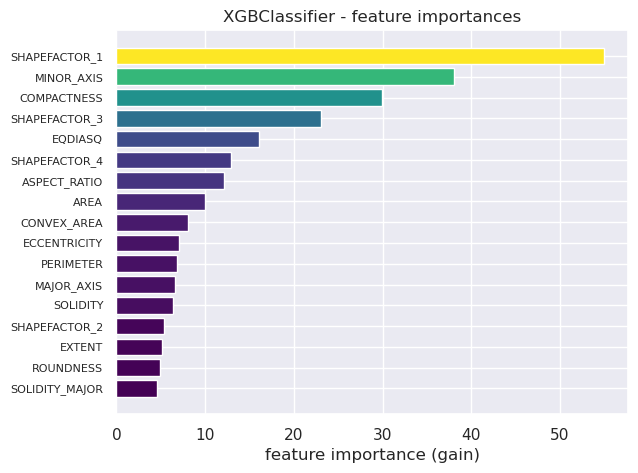

In [19]:
fig, ax = plot_feature_importances(model, title='XGBClassifier - feature importances')
fig.savefig('./figures/model_feature_importances.png')

In [20]:
def evaluation_metrics(predicted_probs, predicted_classes, actual_classes, prefix=None):
    """evaluate results"""
    results = {}
    prefix = '' if prefix is None else prefix
    results[f"{prefix}roc_auc_score"] = roc_auc_score(actual_classes, predicted_probs)
    results[f"{prefix}precision_score"] = precision_score(actual_classes, predicted_classes)
    results[f"{prefix}recall_score"] = recall_score(actual_classes, predicted_classes)
    results[f"{prefix}f1_score"] = f1_score(actual_classes, predicted_classes)
    results[f"{prefix}accuracy_score"] = accuracy_score(actual_classes, predicted_classes)
    return results

    

In [21]:
evaluation_metrics(train_predicted_probs, train_predicted_classes, train_y)

{'roc_auc_score': 0.970653942839731,
 'precision_score': 0.9148073022312373,
 'recall_score': 0.915736040609137,
 'f1_score': 0.9152714358193811,
 'accuracy_score': 0.9027939464493597}

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
sns.set()

def make_roc_plot(predicted_probs, actual_classes, title: str="ROC curve", xlabel='False Positive Rate',ylabel: str='True Positive Rate'):
    """make a roc curve"""
    fpr, tpr, _ = roc_curve(actual_classes, predicted_probs)
    fig = plt.figure()
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    ax.plot(fpr, tpr, color=sns.xkcd_rgb['blurple'], label='roc curve')
    ax.plot([0.0, 1.0],[0.0, 1.0], color=sns.xkcd_rgb['merlot'], linestyle='--', label='random')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    # fig.show()
    return fig, ax


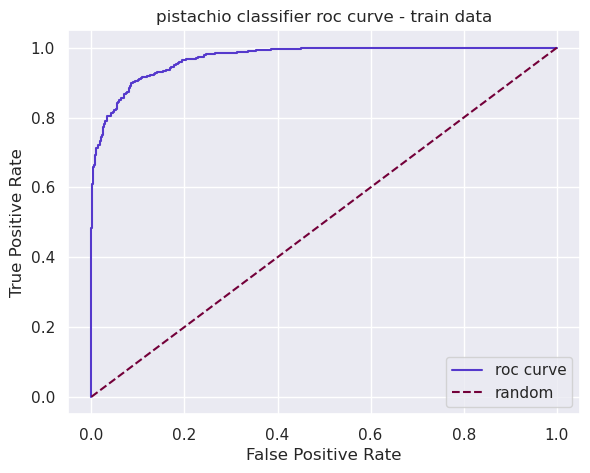

In [23]:
fig, ax = make_roc_plot(train_predicted_probs, train_y, title='pistachio classifier roc curve - train data')
fig.savefig('./figures/train_roc_plot.png')

In [24]:
from sklearn.metrics import confusion_matrix
def make_confusion_matrix_plot(
    predicted_classes,
    actual_classes,
    title:str = 'confusion matrix',
    xlabel: str='predicted class',
    ylabel: str='actual class',
    class_names: List[str] = None,
    normalise:str=None
    ):
    """ generate confusion matrix plot"""
    fig = plt.figure()
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    ax.grid(False)
    # cmap = sns.color_palette("magma_r", as_cmap=True)
    cmap = sns.light_palette("indigo", as_cmap=True)

    # cmap = 'viridis'
    
    matrix = confusion_matrix(actual_classes,predicted_classes, normalize=normalise)
    ax.imshow(matrix, cmap=cmap)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(i,j,f'{matrix[i,j]}')
    # ax.plot([0.0, 1.0],[0.0, 1.0], color=sns.xkcd_rgb['merlot'], linestyle='--', label='random')
    labels = class_names if class_names else ['0','1']

    ax.set_xlim([-0.5, matrix.shape[0]- 0.5])
    ax.set_ylim([matrix.shape[0]- 0.5, -0.5])
    ax.set_xticks(np.arange(matrix.shape[0]))
    ax.set_yticks(np.arange(matrix.shape[0]))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    # ax.legend()
    # fig.show()
    return fig, ax


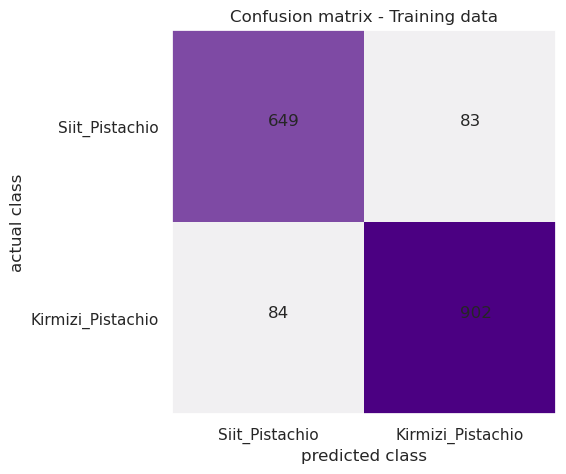

In [25]:
fig, ax = make_confusion_matrix_plot(
    train_predicted_classes, 
    train_y,
    class_names=train_proc.Class.cat.categories.to_list(),
    title='Confusion matrix - Training data'
    
)
fig.savefig('./figures/train_confusion_matrix.png')

In [26]:
from sklearn.metrics import precision_recall_curve, average_precision_score
sns.set()

def make_precision_recall_plot(predicted_probs, actual_classes, title: str="ROC curve", xlabel='False Positive Rate',ylabel: str='True Positive Rate',
                              positive_rate:float=None):
    """make a roc curve"""
    precision, recall, _ = precision_recall_curve(actual_classes, predicted_probs)
    fig = plt.figure()
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    classifier_average_precision = average_precision_score(actual_classes, predicted_probs)
    ax.plot(recall, precision, color=sns.xkcd_rgb['blurple'], label=f'precision recall curve (average precision = {classifier_average_precision:0.3f}')
    if positive_rate:
        ax.plot([0.0, 1.0],[positive_rate, positive_rate], color=sns.xkcd_rgb['merlot'], linestyle='--', label=f'positive response rate = {positive_rate:0.3f}')
    
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(title)
    ax.legend()
    # fig.show()
    return fig, ax

    



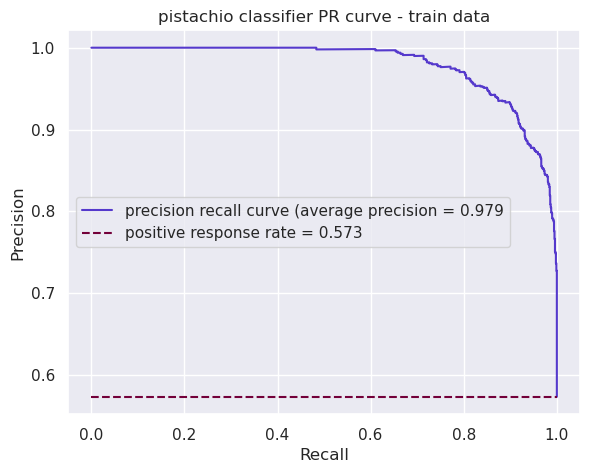

In [27]:
fig, ax = make_precision_recall_plot(train_predicted_probs, train_y, title='pistachio classifier PR curve - train data', positive_rate=train_positive_response_rate)
fig.savefig('./figures/train_PR_plot.png')

In [28]:
# probability calibration
import statsmodels
#statsmodels.stats.proportion.proportion import conf_int
# statsmodels.stats.proportion.proportion_confint
from statsmodels.stats.proportion import proportion_confint
import scipy

def make_prob_calibration_plot(predicted_probs, actual_classes, n_bins: int=20, alpha: float = 0.05, title:str = 'probability calibration'):
    """bin records, check that proportion of labels in each bin matches mean probability of that bin"""
    bins = pd.qcut(predicted_probs, n_bins, labels=False)
    df = pd.DataFrame({'probability':predicted_probs, 'class':actual_classes, 'bin':bins})
    df = df.sort_values(by='probability',ascending=False).reset_index(drop=True)
    agged = df.groupby('bin').agg(
        pred_prob=pd.NamedAgg('probability','mean'),
        pred_std=pd.NamedAgg('probability','std'),
        class_prob=pd.NamedAgg('class','mean'),
        class_sum=pd.NamedAgg('class','sum'),
        bin_size=pd.NamedAgg('class','count')
    )
    act_err_low, act_err_high = proportion_confint(agged.class_sum, agged.bin_size, method='wilson', alpha = alpha)
    z_low = scipy.stats.norm.ppf(alpha/2)
    z_high = scipy.stats.norm.ppf(1.0 - alpha/2)
    agged['pred_low'] =  -z_low*agged['pred_std']/np.sqrt(agged['bin_size']) # agged['pred_prob'] +
    agged['pred_high'] = z_high*agged['pred_std']/np.sqrt(agged['bin_size']) #+ agged['pred_prob'] + 
    agged['actual_error_high'] = act_err_high  - agged.class_prob
    agged['actual_error_low'] =  agged.class_prob - act_err_low
    agged.loc[np.abs(agged.actual_error_high) < 1e-10, 'actual_error_high'] = 0
    

    # print(agged)
    # print(agged)
    fig = plt.figure()
    ax = fig.add_axes([0.1,0.1, 0.8, 0.8])
    ax.errorbar(
        agged.pred_prob, 
        agged.class_prob, 
        yerr=[agged.actual_error_low, agged.actual_error_high], 
        xerr=[agged.pred_low,agged.pred_high],
        fmt='.', 
        color=sns.xkcd_rgb['blurple'])
    ax.plot([0.0,1.0],[0.0,1.0],'--',label='ideal', color=sns.xkcd_rgb['dark blue'])
    ax.set_title(title)
    ax.set_xlabel('predicted probability')
    ax.set_ylabel('observed probabiilty')
    return fig, ax
    
    
    

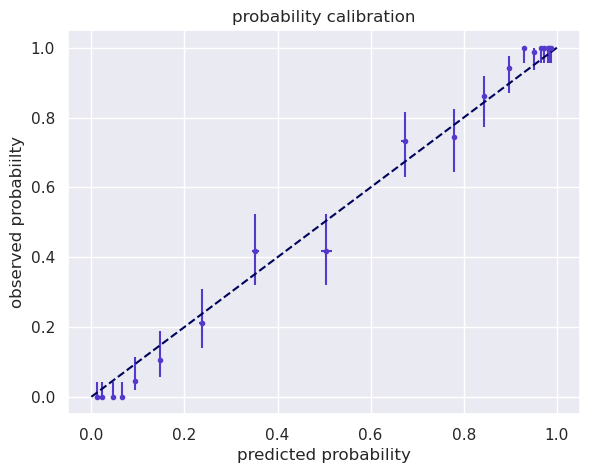

In [29]:
fig, ax = make_prob_calibration_plot(train_predicted_probs, train_y, n_bins=20)
fig.savefig('./figures/train_probability_calibration_plot.png')

## Test Data Evaluation

In [30]:
test = pd.read_parquet(test_path)
validate_data(test, input_data_schema_path)
test_proc = preprocess(test)


In [41]:
psi = PSImetrics.load(psi_path)
psi_values, details = psi.evaluate(test_proc)

read data from ./data/pistachio_psi_train.pkl
the following columns will not be evalutated: []
evaluated column Class, PSI = 4.74777407868861e-06
evaluated column Target, PSI = 4.74777407868861e-06
The following categories had zero count in evaluation data but were observed in reference data: [0]
The following categories had zero count in reference data but were observed in evaluation data: [20, 21]
evaluated column SOLIDITY_MAJOR, PSI = 0.944406139443209
The following categories had zero count in evaluation data but were observed in reference data: [0]
The following categories had zero count in reference data but were observed in evaluation data: [20, 21]
evaluated column ECCENTRICITY, PSI = 0.9169192916539063
The following categories had zero count in evaluation data but were observed in reference data: [0]
The following categories had zero count in reference data but were observed in evaluation data: [20, 21]
evaluated column CONVEX_AREA, PSI = 0.891503766621767
The following catego

In [49]:
psi_values

[('Class',
  4.74777407868861e-06,
  'categorical',
  CategoricalDtype(categories=['Siit_Pistachio', 'Kirmizi_Pistachio'], ordered=False)),
 ('Target', 4.74777407868861e-06, 'categorical', dtype('int8')),
 ('SOLIDITY_MAJOR', 0.944406139443209, 'continuous', dtype('float64')),
 ('ECCENTRICITY', 0.9169192916539063, 'continuous', dtype('float64')),
 ('CONVEX_AREA', 0.891503766621767, 'continuous', dtype('float64')),
 ('ROUNDNESS', 0.7625652508865296, 'continuous', dtype('float64')),
 ('SHAPEFACTOR_4', 0.971160910782754, 'continuous', dtype('float64')),
 ('SOLIDITY', 0.8017206020886567, 'continuous', dtype('float64')),
 ('PERIMETER', 0.8497691763262797, 'continuous', dtype('float64')),
 ('ASPECT_RATIO', 0.9412355220897095, 'continuous', dtype('float64')),
 ('SHAPEFACTOR_3', 0.921956666013464, 'continuous', dtype('float64')),
 ('EXTENT', 1.0234284388843082, 'continuous', dtype('float64')),
 ('MINOR_AXIS', 0.9354281935999281, 'continuous', dtype('float64')),
 ('AREA', 0.9645620409692323, 'co

In [48]:
psi_eval_path = './data/test_psi_evaluation.json'
# https://stackoverflow.com/a/57915246
import numpy as np
import json
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, (np.int_, np.intc, np.intp, np.int8,
                            np.int16, np.int32, np.int64, np.uint8,
                            np.uint16, np.uint32, np.uint64)):

            return int(obj)

        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)
with open(psi_eval_path, 'w') as outfile:
    outfile.write(json.dumps(details, cls=NpEncoder))



TypeError: keys must be str, int, float, bool or None, not numpy.int8

In [50]:
features = [x for x in test_proc.columns if x not in ['Class','Target']]
test_x = test_proc[features]
test_y = test_proc.Target.values

In [51]:
test_predicted_probs = model.predict_proba(test_x)[:,1]
# test_predicted_probs[0:5]
test_predicted_classes = model.predict(test_x)
test_predicted_classes[0:5]
test_predicted_labels = np.array([test_proc.Class.cat.categories[x] for x in test_predicted_classes])
test_positive_responses = np.sum(test_y)
test_positive_response_rate = np.sum(test_y)/len(test_y)

In [52]:
evaluation_metrics(test_predicted_probs, test_predicted_classes, test_y)

{'roc_auc_score': 0.9502444636180616,
 'precision_score': 0.8830645161290323,
 'recall_score': 0.8866396761133604,
 'f1_score': 0.8848484848484848,
 'accuracy_score': 0.8674418604651163}

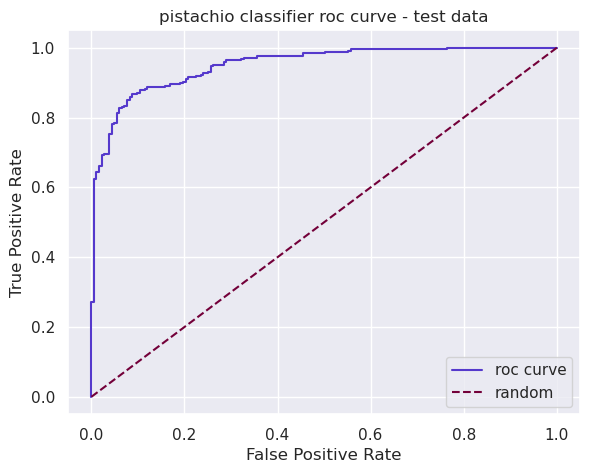

In [53]:
fig, ax = make_roc_plot(test_predicted_probs, test_y, title='pistachio classifier roc curve - test data')
fig.savefig('./figures/test_roc_plot.png')

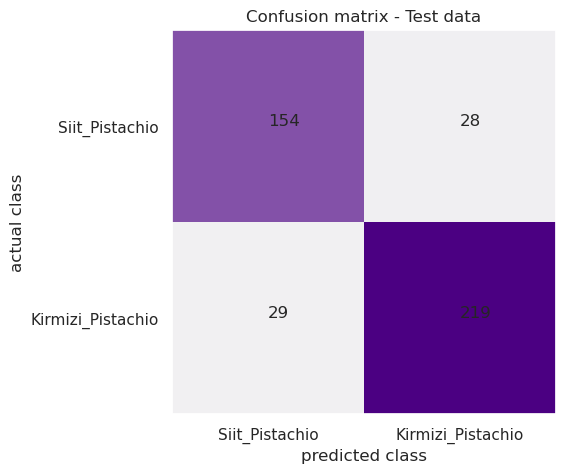

In [54]:
fig, ax = make_confusion_matrix_plot(
    test_predicted_classes, 
    test_y,
    class_names=test_proc.Class.cat.categories.to_list(),
    title='Confusion matrix - Test data'
    
)
fig.savefig('./figures/test_confusion_matrix.png')

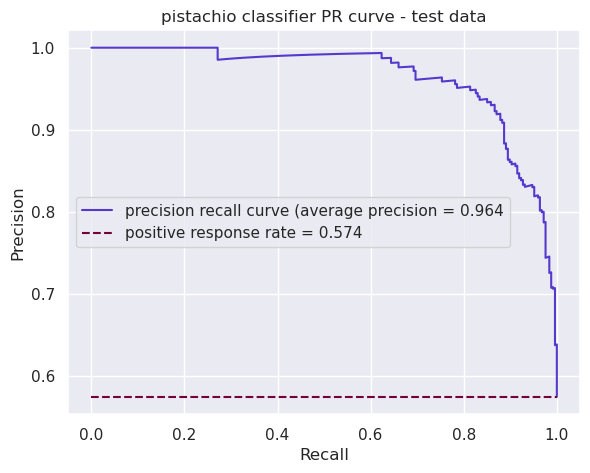

In [55]:
fig, ax = make_precision_recall_plot(test_predicted_probs, test_y, title='pistachio classifier PR curve - test data', positive_rate=test_positive_response_rate)
fig.savefig('./figures/test_PR_plot.png')

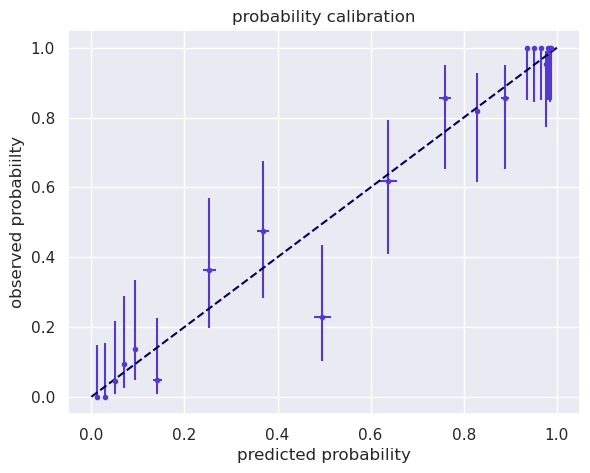

In [56]:
fig, ax = make_prob_calibration_plot(test_predicted_probs, test_y, n_bins=20)
fig.savefig('./figures/test_probability_calibration_plot.png')

In [39]:
# for x in train.columns:
#     schema = schema.update_column(x, nullable=False)
sc2 = pa.DataFrameSchema({
    'col1': pa.Column(str, nullable=True),
    'col2': pa.Column(int, nullable=False, unique=True)})
print(sc2)


<Schema DataFrameSchema(
    columns={
        'col1': <Schema Column(name=col1, type=DataType(str))>
        'col2': <Schema Column(name=col2, type=DataType(int64))>
    },
    checks=[],
    coerce=False,
    dtype=None,
    index=None,
    strict=False,
    name=None,
    ordered=False,
    unique_column_names=False,
    metadata=None, 
    add_missing_columns=False
)>


In [40]:
print(schema)

NameError: name 'schema' is not defined

In [ ]:
#print(schema.to_script())

In [ ]:
# import pandera
# pandera.__version__
import xgboost
xgboost.__version__